## Multiple Linear Regression Models - Closed-form solution - Least Squares Method

In [185]:
# Python 3.6 environment
# Load libraries
import datetime
import pandas as pd
import numpy as np
import numpy.matlib
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, metrics, datasets

from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch
from IPython import display

Online Video Characteristics and Transcoding Time Dataset Data Set
http://archive.ics.uci.edu/ml/datasets/Auto+MPG

Data Description:

1. id = Youtube videp id
2. duration = duration of video
3. bitrate bitrate(video) = video bitrate
4. height = height of video in pixles
5. width = width of video in pixles
6. frame rate = actual video frame rate
7. frame rate(est.) = estimated video frame rate
8. codec = coding standard used for the video
9. category = YouTube video category
10. url = direct link to video (has expiration date)
11. i = number of i frames in the video
12. p = number of p frames in the video
13. b = number of b frames in the video
14. frames = number of frames in video
15. i_size = total size in byte of i videos
16. p_size = total size in byte of p videos
17. b_size = total size in byte of b videos
18. size = total size of video
19. o_codec = output codec used for transcoding
20. o_bitrate = output bitrate used for transcoding
21. o_framerate = output framerate used for transcoding
22. o_width = output width in pixel used for transcoding
23. o_height = output height used in pixel for transcoding
24. umem = total codec allocated memory for transcoding
25. utime = total transcoding time for transcoding

First, the dataset is read into a [pandas](http://pandas.pydata.org/pandas-docs/stable/) DataFrame and NaN values are dropped.


In [192]:
df=pd.read_csv('transcoding_measurement.tsv',low_memory=False,delim_whitespace=True, header=None,na_values='?')
df.columns=['id','duration','codec','width','height','bitrate',\
            'framerate','i','p','b','frames','i_size','p_size','b_size',\
           'size','o_codec','o_bitrate','o_framerate','o_width','o_height',\
           'umem','utime']
df.dropna(how='any',axis=0, inplace=True)
df.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12,27,1537,0,...,825054,0,889537,mpeg4,56000,12,176,144,22508,0.612
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12,27,1537,0,...,825054,0,889537,mpeg4,56000,12,320,240,25164,0.98
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12,27,1537,0,...,825054,0,889537,mpeg4,56000,12,480,360,29228,1.216
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12,27,1537,0,...,825054,0,889537,mpeg4,56000,12,640,480,34316,1.692


Let's convert a subset of columns to a regular [numpy](http://www.numpy.org/) array. Conversion between DataFrames and numpy arrays is straight forward. 

Naming convention:*

- X = *feature matrix* or *independent variables* [2D array, n observations by x features].
- *target* is the *dependent variable* or *y* [1D array, n observations].

Here ```'size'``` is the target variable that is predicted via ```'duration'``` and ```'framerate'```.

In [193]:
X=np.array(df[['duration','framerate']])[1:] # remove names of each column with [1:]
X=np.asarray(X, dtype=float) # convert str into float type.
intercept_ones = np.array(np.ones(len(df)-1)).reshape(-1,1) # intercept is expected mean value of target
X=np.concatenate((intercept_ones, X) , axis=1)
target = np.array(df['size'])[1:]
target=np.asarray(target, dtype=float) # convert str into float type.
print('Shape of X:', X.shape)
print('Shape of target:', target.shape)

Shape of X: (68784, 3)
Shape of target: (68784,)


The mathematical problem statement can be expressed as follows:  

$ X * betas = target $      
Or standard notation is $ A\vec{x} = \vec{b} $     

X and target are known when training the model. Therefore, we have to approximate the betas (the coefficients or weights) as best as we can (there is no exact solution) to later predict new target values. This problem can be solved using the linear least quares method.  

First the betas are calculated and then used to predict the target variable. These predicted vales can be graphically presented as plane (see graph below).

In [194]:
betas = np.linalg.lstsq(X,target)[0] # np.linalg.solve only if matrix is a square matrix
print('Regression Coefficients with intercept (numpy): \n', betas)
print('Regression Coefficients with intercept (low level less stable numpy): \n', 
      np.linalg.inv(X.T.dot(X)).dot(X.T).dot(target))
target_predict = betas[0]*1 + betas[1]*X[:,1] + betas[2]*X[:,2] # or simply X.dot(beta)

Regression Coefficients with intercept (numpy): 
 [-36602027.77441006     79870.81395547   1667239.9087598 ]
Regression Coefficients with intercept (low level less stable numpy): 
 [-36602027.77441041     79870.81395548   1667239.90875981]


In the next cell  the results to sklearn's [linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) are compared. Note that you should only "not fit an intercept" when the data is already centered, that is, expected mean value of target is zero.

In [195]:
# use sklearn library
lm = linear_model.LinearRegression(fit_intercept=False) 
# this may be confusing as intercept is already in matrix X  set it False here
lm.fit(X, target)
target_predict2 = lm.predict(X)
print('Sklearn Regression Coefficients with intercept: \n', lm.coef_)

# alternatively you run the following
X1 = np.array(df[['duration','framerate']])[1:]
lm = linear_model.LinearRegression(fit_intercept=True) 
lm.fit(X1, target)
print('Sklearn Regression Coefficients with intercept setting fit_intercept=True: \n', lm.coef_)


Sklearn Regression Coefficients with intercept: 
 [-36602027.77441008     79870.81395547   1667239.90875978]
Sklearn Regression Coefficients with intercept setting fit_intercept=True: 
 [   79870.81395547  1667239.90875976]


Above solution is true for using any number of features (from 1 to n features). Below is a graph of the plane we fitted to the data. We fitted the plan as best as we could to predict 'size'.

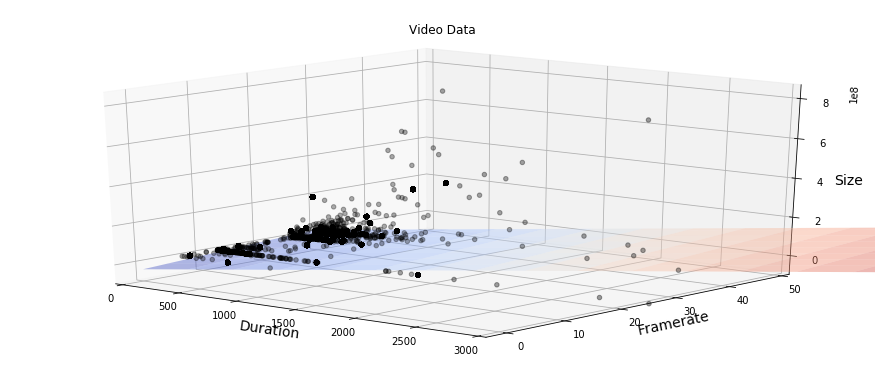

In [196]:
# Plot multiple regression
# Here 2 features -> Fitting a plane, can be visualized
from matplotlib import cm
Xgrid, Ygrid = np.meshgrid(np.arange(0, 6000, 50), np.arange(0, 30, .5))
Zgrid = betas[0]*1 + betas[1]*Xgrid + betas[2]*Ygrid

fig = plt.figure(figsize=(12,5))
ax = Axes3D(fig)
ax.scatter(X[:,1], X[:,2],target, c='k', marker='o')
ax.plot_surface(Xgrid, Ygrid, Zgrid,rstride=8, cstride=8, alpha=0.4,cmap=cm.coolwarm, linewidth=0.2)
ax.set_title('Video Data')
ax.set_xlim(left=0, right=3000)
ax.set_xlabel('Duration',fontsize=14)
ax.set_ylabel('Framerate',fontsize=14)
ax.set_zlabel('Size',fontsize=14)
ax.view_init(elev=20, azim=-50)
plt.savefig('MultipleLinearRegression.jpg',dpi=300)

Below are calculations to get a measure of the Goodness of Fit, namely, R squared and Adjusted R squared. It tells you how well your model fits the data, that is, in our graph above how well the plane is aligned with the data points.

In [197]:
# numpy/scipy approach: statistics to determine goodness of fit
ssreg = np.sum((target_predict-np.mean(target))**2)
sstotal = np.sum((target-np.mean(target))**2)
ssres = sstotal - ssreg

Rsquared = ssreg/sstotal # same as lm.score(X,target) # this is not adjusted RSquared as below
print('R^2: ', Rsquared)

N=len(X)
df1=2 # 2 features here
df2=N-df1-1
alpha = 0.05
Fvalue = (ssreg/df1)/(ssres/df2)
Fcritical = stats.f.ppf(1-alpha, df1, df2) 

Rsquared_adjusted= 1 - (((1-Rsquared)*(N-1))/(df2))
print('Adjusted R^2: ', Rsquared_adjusted)

R^2:  0.223295896082
Adjusted R^2:  0.223273311238


### 2. Regression Models Scenario 2 - Multiple Linear Regression with mixed data

Above scenario with having continuous features only will not always be the case. You often have to deal with mixed data, that is, some features are continuous while others are categorical.

Here, with the Online Video Characteristics and Transcoding Time Dataset Data Set, one categorical type of data can be the codec of a video.

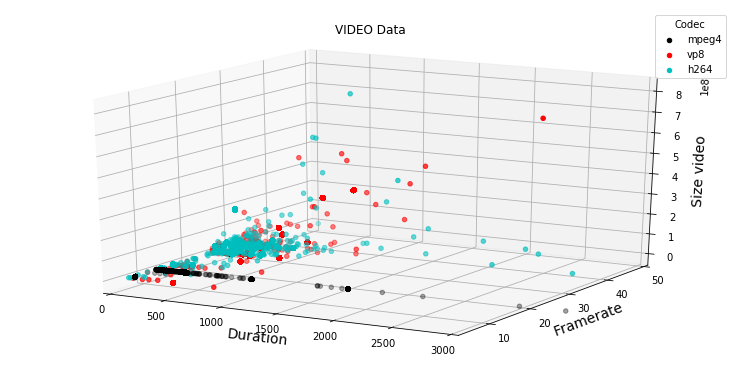

In [198]:
# selecting only mpeg4 or vp8 or h264 video
codecs = ["mpeg4","vp8","h264"]

# codec : df
dfs = { codec : df.loc[df["codec"] == codec]
          for codec in codecs }

#3D plot
col_list = ['k','r','c']
fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)

for i, codec in enumerate(codecs):
    #curr = df2['codec'] == codec
    ax.scatter(
        pd.to_numeric(dfs[codec]['duration']), 
        pd.to_numeric(dfs[codec]['framerate']), 
        pd.to_numeric(dfs[codec]['size']), 
        c=col_list[i], marker='o',label=codec
    )

ax.legend(title='Codec',loc='upper right')
ax.set_title('VIDEO Data')
ax.set_xlim(left=0, right=3000)
ax.set_xlabel('Duration',fontsize=14)
ax.set_ylabel('Framerate',fontsize=14)
ax.set_zlabel('Size video',fontsize=14)
ax.view_init(elev=20, azim=-60)

The only difference to Scenario 1 is that the categorical data has to be encoded as numbers representing their category. However, numbers such as 1, 2 and 3 would imply *ordinality*, that is, 3 is larger than 1, whereas in reality it is just a different category. To overcome this issue, we perform **one-hot-encoding** or **dummy encoding**. It basically expands the categorical vector to n vectors (one for each category) and only assigns a 1 for the respective category, otherwise 0. With expanding I literally mean instead of one column in your feature matrix/DataFrame you have as many columns as unique categories, here 3!

In [202]:
# selecting only mpeg4 or vp8 or h264 video
codecs = ["mpeg4","vp8","h264"]
df2=df[df['codec'].isin(codecs)]
# get dummy variables one model_year / one hot encoding (alternatively use sklearn library)
df2=pd.get_dummies(df2, prefix=None, prefix_sep='_', dummy_na=False, columns=['codec'], sparse=False)
df2[['duration','framerate','codec_mpeg4','codec_vp8','codec_h264']].sample(n=10)

### RERUN above cell if you can an error tha model_year is not contained in df, 
### the original categorical feature gets got dropped

,duration,framerate,codec_mpeg4,codec_vp8,codec_h264
26064,384.451,29,0,0,1
31227,176.901,25.113636,0,1,0
38677,37.011665,29,0,0,1
7198,906.5983,12,1,0,0
4843,59.883,30.38983,0,1,0
62988,311.1,12,1,0,0
7746,476.957,30.05252,0,1,0
26978,98.683334,12,1,0,0
49476,143.03334,12,1,0,0
36594,339.667,30,0,0,1


In [203]:
# prepare feature data matrix and target variable
X=np.array(df2[['duration','framerate','codec_mpeg4','codec_vp8','codec_h264']])[1:]
X=np.asarray(X, dtype=float) # convert str into float type.
intercept_ones = np.array(np.ones(len(df2)-1)).reshape(-1,1)
X=np.concatenate((intercept_ones, X) , axis=1)
target = np.array(df2['size'])[1:]
target = np.asarray(target, dtype=float)
# numpy approach: minimize sum of squared deviations (least squares)
betas = np.linalg.lstsq(X,target)[0] 
target_predict = X.dot(betas)


# use sklearn library
lm = linear_model.LinearRegression(fit_intercept=False)
lm.fit(X, target)
target_predict2 = lm.predict(X)
Rsquared=lm.score(X,target)
print('R^2: ', Rsquared)

R^2:  0.243612238235
